# Using Google's Single Shot Detector (SSD) in Tensorflow and Keras for Object Detection and Recognition

### Completed by Sean Reddy (sr3336)
#### Columbia University
#### Fall 2017 Advanced Machine Learning (GR5243) Section 002
#### Capstone Final Project
#### December 17. 2017

<img src="./images/sd_car.png">

### INTRODUCTION

An ever increasingly popular application of deep learning within computer vision revolves around object detection. This problem relies on computer vision to identify not only what objects are in images, but precisely where these objects are in the relative frame. The manner in which these objects are identified is an inherently different problem than traditional object recognition as it's a combination of both object detection and recognition. This is the foundational problem we are attempting to curate a solution for within this project.

### RESOURCES AND TOOLS USED


#### Available Frameworks

As for the object detection framework itself, we are presented with several options. Some of the well known and frequently used frameworks include (with respective sources):

- R-CNN (Regions with Convolutional Neural Network features) || https://arxiv.org/abs/1311.2524
- Faster R-CNN || https://arxiv.org/abs/1506.01497
- SSD (Single-Shot Detector) || https://arxiv.org/abs/1512.02325
- YOLO (You Only Look Once) || https://arxiv.org/abs/1506.02640

In the above options, we see varying results as well as performance within each framework. Having worked in industry this past summer, I have learned recently industry leaders tend to use either YOLO or SSD (Single Shot Detector) due to performance improvements over R-CNN or Faster R-CNN. Having worked alongside team members who utilized YOLO, I've had the opportunity to see its use cases and implementation second hand. Due to a lack of formal and professional documentation in YOLO (as reference, the YOLO creator's resume: https://pjreddie.com/static/Redmon%20Resume.pdf) and a desire to explore a new framework, I ultimately decided to look into one of the newest and most widely praised detectors, SSD.

#### SSD

The first step in using this network for our purposes is understanding precisely what it is doing under the hood. Let's take a look at the architecture below.

<img src="./images/ssd_architecture.png">

(Source: https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab)


SSD is backed by a pretrained VGG classifier as shown in the first few blocks of the network. The network then feeds the output into further convolutional layers intended to identify bounding boxes (sections) of the image which it objects are likely. The output consists of a vector for each object detected. This vector contains information on the bounding box it has identified contains an object, the class that it believes is within this bounding box, and the confidence level.

As mentioned, SSD, like several other object-detection frameworks, utilizes a bounding box approach for object detection. The network is structured in such a way that it has pre-defined boxes that the network attempts to look for images within. The general idea is that we are running a collection of sub-images, derived from the original image, through the object-recognition framework, returning the results to the network, and then combining these results to identify all of the objects and respective locations within the image (with a certain confidence level). An illustration of some of the predefined bounding boxes is shown below:

<img src="./images/boundingboxes.png">

(Source: https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab)

The final part of the network (or process) is Non-Maximal Suppression. If we detect an object within a bounding box with a high enough confidence level, we then look for nearby boxes with the same classification, cleverly combining boxes that overlap (again, thresholded at a certain area overlap called IOU, Intersection Over Union. 

This process attempts to encapsulate the entire object that appears within multiple boxes. This is what we are referring to when we say Non-Maximal Suppression (NMS). Depending on the framework and implementation, non-maximal suppression may be part of the network or done in post-processing.

<img src="./images/NMS.jpg">

(Source: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/)

Now that we have defined our network, we can train our network by combining our confidence loss in object recognition (were we confident in finding the proper objects?) paired with location loss (did we find objects in the right places?) via calculating using IOU of the ground truth similarly to shown below.

<img src="./images/iou.png">

(Source: https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab)


#### Keras

Keras is a deep learning module built on top of Tensorflow that allows us to more easily structure our data flow, and manipulate layers of the network. Things like color augmentation for robustness in training are inherently built-in functions within Keras (which is not the case in something like standalone Tensorflow).

For this project, I have chosen to work in Keras as it’s the industry standard and library framework that I will likely be using in my profession following graduation. One of the main reasons this is used in industry is that Keras is iOS-compatible and supported by Apple for producing computer vision applications using their “coremltools” library (allowing direct conversions of Keras models to Swift in iOS). Apple currently does not support direct tensorflow model conversions into any iOS-compatible format.

Fortunately, I was able to quickly find a port of SSD into Keras (https://github.com/rykov8/ssd_keras). I will disect and go into detail on this network and it's implementation a bit later.


### DATA

For this project, the SSD network used was trained on the PASCAL VOC2012 Dataset. 

It contains over 10000 images containing nearly 30000 different objects across 20 distinct classes, all annotated with the relative locations of these objects within the images. The dataset provided is already pre-split into training and validation sets. Please see precisely what is provided in the table below.

<img src="./images/voc2012_info.png">

(Source: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/devkit_doc.pdf).



You may find the download link for the PASCAL VOC2012 Dataset in the link below.

(Source: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html)

In [ ]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

### PROCESS

The general workflow after we have identified the problem we want to solve, as with most deep learning projects is as follows:

1. Find or build a model architecture appropriate for your problem
2. Modify this model as desired
3. Train the model iteratively to gradually improve performance
4. Test the model on a set of data the model has not yet seen
5. Evaluate and analyze the model's performance

### ENVIRONMENT SETUP

In [10]:
!conda info

Current conda install:

               platform : linux-64
          conda version : 4.3.22
       conda is private : False
      conda-env version : 4.3.22
    conda-build version : not installed
         python version : 2.7.13.final.0
       requests version : 2.14.2
       root environment : /home/ecbm4040/miniconda2  (writable)
    default environment : /home/ecbm4040/miniconda2/envs/dlenv
       envs directories : /home/ecbm4040/miniconda2/envs
                          /home/ecbm4040/.conda/envs
          package cache : /home/ecbm4040/miniconda2/pkgs
                          /home/ecbm4040/.conda/pkgs
           channel URLs : https://repo.continuum.io/pkgs/free/linux-64
                          https://repo.continuum.io/pkgs/free/noarch
                          https://repo.continuum.io/pkgs/r/linux-64
                          https://repo.continuum.io/pkgs/r/noarch
                          https://repo.continuum.io/pkgs/pro/linux-64
                          https://repo

In [11]:
!conda list

# packages in environment at /home/ecbm4040/miniconda2/envs/dlenv:
#
certifi                   2016.2.28                py35_0  
cycler                    0.10.0                   py35_0  
dbus                      1.10.20                       0  
decorator                 4.1.2                     <pip>
entrypoints               0.2.3                     <pip>
expat                     2.1.0                         0  
fontconfig                2.12.1                        3  
freetype                  2.5.5                         2  
glib                      2.50.2                        1  
gst-plugins-base          1.8.0                         0  
gstreamer                 1.8.0                         0  
h5py                      2.7.1                     <pip>
icu                       54.1                          0  
ipykernel                 4.6.1                     <pip>
ipython                   6.1.0                     <pip>
ipython-genutils          0.2.0          

In [ ]:
!pip install -r requirements.txt

### Import Required Libraries

In [12]:
import cv2

import tensorflow as tf

import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
import pickle

from random import shuffle
from scipy.misc import imread
from scipy.misc import imresize

from ssd import SSD300
from ssd_training import MultiboxLoss
from ssd_utils import BBoxUtility

from data_generator import Generator
from get_data_from_XML import XML_preprocessor

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

Using TensorFlow backend.


### Preprocess Data for Network

We must first extract annotated bounding box information that corresponds to images in our VOC2012 training data. This function pre-processes the annotations provided in XML files.

This script was written by the author of the SSD-keras port (Source: https://github.com/rykov8/ssd_keras) for VOC2007 data and remains consistent for the VOC2012 dataset. You may view the full code in `get_data_from_XML.py`.

In [13]:
data = XML_preprocessor('./PASCAL_VOC/VOC2012/Annotations/').data

In [14]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']

In [15]:
# Let's look at one entry in the dictionary
example_img_path = '2007_000032.jpg'
example_boxes = data[example_img_path]
example_boxes

array([[ 0.208     ,  0.27758007,  0.75      ,  0.65124555,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.266     ,  0.31316726,  0.394     ,  0.43772242,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.39      ,  0.6405694 ,  0.426     ,  0.81494662,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
  

So we see that this preprocessing function yields us an array that has information on each object found, reporting the bounding box (4 scale-invariant coordinates) and a 1-hot vector representation of the class that the sub-image within the aforementioned bounding box belongs to. Let's map the latter half of this vector (one-hot part) to the numeric class index (subtracting 4 index spots from the bounding boxes).

In [28]:
labels = [[i-4 for i, val in enumerate(example_boxes[j]) if val == 1] for j in range(4)]

In [29]:
labels

[[0], [0], [14], [14]]

For this particular image, we see four boxes that are drawn, representing two different classes of images -- classes 0 and 14 representing Aeroplane and Person respectively. Let's visualize what this input looks like.

In [33]:
img_path = './PASCAL_VOC/VOC2012/JPEGImages/'

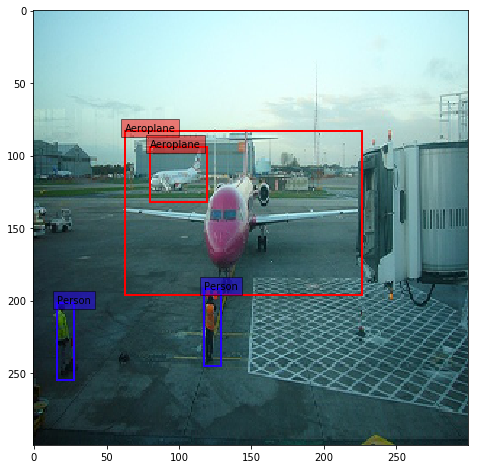

In [34]:
x_pix = 300
y_pix = 300

img = image.load_img(img_path + example_img_path, target_size=(x_pix, y_pix))
img = image.img_to_array(img)

colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

plt.imshow(img / 255.)
currentAxis = plt.gca()

for i in range(4):
    xmin = example_boxes[i][0]*x_pix
    ymin = example_boxes[i][1]*y_pix
    xmax = example_boxes[i][2]*x_pix
    ymax = example_boxes[i][3]*y_pix
    label = labels[i][0]
    label_name = voc_classes[label]
    display_txt = label_name
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

plt.show()

In the image above, you can see the four distinct boxes drawn, with their respective labels. This is ultimately the exact format that we are looking for when we run a blank image through our SSD network.

Our training data will be input to our model as a pair of images with their respective bounding box and class annotations. Let's save the annotations for later so we can references our original data source if we need to.

In [35]:
pickle.dump(data, open('VOC2012.p','wb'))

### MODEL SETUP AND TRAINING

In [95]:
# Constants. 

NUM_CLASSES = 20 + 1
input_shape = (x_pix, y_pix, 3) # The last dimension == 3 Represents the three channels of an RGB Image


Please note there is 1 additional class that is required on top of the number of classes that are actually in the VOC2012 dataset.

This allows for the ability to classify as "none of the above". Since the network utilizes a softmax layer, we don't want to force it to allocate confidence in classes if it does not fit any of the categories well.

An additional parameter that we have for this model involves the priors. Priors indicate the occurrence of objects in general within certain bounding boxes. Intuitively, an object is less likely to appear within a box 1/4 the size of another box. These are provided for us from the original SSD->Keras port, so we will just load in the pickled weights. These can be generated from a scratch via a script provided by a third party (linked below).

(Source: https://gist.github.com/codingPingjun/aa54be7993ca6b2d484cccf5a2c5c3d4)

In [37]:
priors = pickle.load(open('prior_boxes_ssd300.pkl', 'rb'))

We also import a bounding box utility that we will utilize throughout the process. This utility allows us to easily compute functions pertaining to these bounding boxes (such as the IOU that combines overlapping boxes). These utilities are also provided by the original port.

In [38]:
bbox_util = BBoxUtility(NUM_CLASSES, priors)

We can now load our annotations for each image and split our dataset into our training and validation data. Please note that the original PASCAL VOC 2012 dataset has a pre-split that it has defined (as 50% in each training/validation), however I chose to split it manually myself as I was interested in having more training data. I utilized an 80%/20% training/validation split instead.

In [39]:
gt = pickle.load(open('VOC2012.p', 'rb'))

keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

The last function that we borrowed from the SSD->Keras port author is the Generator function. This generator is one of the primary reasons I have chosen to use Keras. We are able to use the a different modification of the same dataset over many epochs very easily using this function. Essentially, we apply random forms of data augmentation on each batch prior to using it as an input to our model. This may include random adjustments to images in the form of:

- Brightness
- Contrast
- Lighting 
- Vertical or Horizontal Flips
- Rotations
- Cropping
- Color Distortions

among other things. All of these augmentations have parameters that can be modified (e.g. you may not want to shift the colors entirely randomly, but rather each channel may shift within a certain reasonable range, say 10%).

The full code is located within `data_generator.py`.

In [40]:
gen = Generator(gt, bbox_util, 16, img_path,
                train_keys, val_keys,
                (input_shape[0], input_shape[1]), do_crop=False)

Finally we are ready to load the model architecture. Let's see what the architecture looks like and ensure it is consistent with the diagram presented in the beginning.

In [41]:
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 300, 300, 3)   0                                            
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 300, 300, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 300, 300, 64)  36928       conv1_1[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 150, 150, 64)  0           conv1_2[0][0]                    
___________________________________________________________________________________________

We can pretty easily follow the structure and see the consistencies with the diagram originally presented. We have early convolutional layers that represent the VGG network, followed by the bounding box confidence and location convolutions in latter layers.

The penultimate step prior to training is initializing some of our hyperparameters, including the learning rate and optimizer. We chose to use a fairly industry standard learning rate and a Nadam optimizer (also standard). We must also specify how long / how much data we wish to use to train in the form of the number of epochs. I chose to use 30 epochs out of respect for time of the project (and resulting reasonable performance).

In [46]:
def schedule(epoch, decay=0.9):
    return base_lr * decay**(epoch)

base_lr = 3e-4
nb_epoch = 30
optim = keras.optimizers.Nadam(lr=base_lr)
model.compile(optimizer=optim,
              loss=MultiboxLoss(NUM_CLASSES, neg_pos_ratio=2.0).compute_loss)

One last item to include with Keras revolves around *Callbacks*. Callbacks are essentially subroutines that run at a certian point in your training process. We wish to record checkpoints of our models every epoch, adjust our learning rate, as well as save some information to visualize in tensorboard. 

In [44]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='checkpoints/', histogram_freq=0, write_graph=True, write_images=True)
callbacks = [keras.callbacks.ModelCheckpoint('checkpoints/weights.{epoch:02d}.hdf5',
                                             verbose=1,
                                             save_weights_only=True),
             keras.callbacks.LearningRateScheduler(schedule),tbCallBack]

We are finally ready to train our model. Passing in __generated__ (modified) batches of our training dataset, we can fit our model and let it train.

This model was trained using a Google Compute Engine Instance equipped with a Tesla K-80 GPU. Each epoch took roughly around 30 minutes to train (with additional time to generate validation loss per epoch). Total training time was roughly 16 hours.

<img src="./images/gpu_info.png">

In [32]:
history = model.fit_generator(gen.generate(True), gen.train_batches,
                              nb_epoch, verbose=1,
                              callbacks=callbacks,
                              validation_data=gen.generate(False),
                              nb_val_samples=gen.val_batches,
                              nb_worker=1)

/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
13696/13700 [============================>.] - ETA: 0s - loss: 4.8544

/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to checkpoints/weights.00.hdf5
13712/13700 [==============================] - 1816s - loss: 4.8539 - val_loss: 3.9219
Epoch 2/30
13712/13700 [==============================] - 1805s - loss: 4.6563 - val_loss: 3.7864
Epoch 3/30
13712/13700 [==============================] - 1802s - loss: 4.6244 - val_loss: 3.7988
Epoch 4/30
13712/13700 [==============================] - 1803s - loss: 4.4069 - val_loss: 3.4451
Epoch 5/30
13712/13700 [==============================] - 1801s - loss: 4.1605 - val_loss: 3.3324
Epoch 6/30
13712/13700 [==============================] - 1801s - loss: 3.9938 - val_loss: 3.1390
Epoch 7/30
13712/13700 [==============================] - 1801s - loss: 3.8426 - val_loss: 3.2444
Epoch 8/30
13712/13700 [==============================] - 1802s - loss: 3.6977 - val_loss: 3.0568
Epoch 9/30
13712/13700 [==============================] - 1804s - loss: 3.5561 - val_loss: 3.0152
Epoch 10/30
13712/13700 [==============================] - 1804s - loss:

### RESULTS

The model fit generator we utilized to train our model automatically saves information regarding the training and validation loss at the end of every epoch. Let's explore how our training process went without having to dig through the printed output above.

In [33]:
history.history

{'loss': [4.8538944050756605,
  4.6562715711782801,
  4.6243550735705092,
  4.4069251863931411,
  4.1604907120400858,
  3.9938231785906653,
  3.842570457881362,
  3.6976594454766434,
  3.5560841015089073,
  3.4419991202226456,
  3.3199297296820056,
  3.2200248767225159,
  3.1312146161790491,
  3.052299366948763,
  2.9763996395235717,
  2.9029281167193917,
  2.8423048032484646,
  2.7822544254805965,
  2.7285695210916439,
  2.6753537003885488,
  2.6289031096628692,
  2.5931633676086032,
  2.5469029492230231,
  2.5073431257328047,
  2.4801369554938066,
  2.4402902636811779,
  2.415123191708862,
  2.3917255665902637,
  2.3694361992171653,
  2.3449147856221595],
 'val_loss': [3.9219171989795774,
  3.7863569736480711,
  3.7988375697025032,
  3.4451239951821262,
  3.3324495426444121,
  3.138975379633349,
  3.2443933764169381,
  3.0567748890366664,
  3.0151796518370162,
  2.8677354723908182,
  2.8641603769258013,
  2.7082760478174963,
  2.6270014352576676,
  2.7328899882560553,
  2.72231786306

In [34]:
pickle.dump(history.history, open('history.p','wb'))

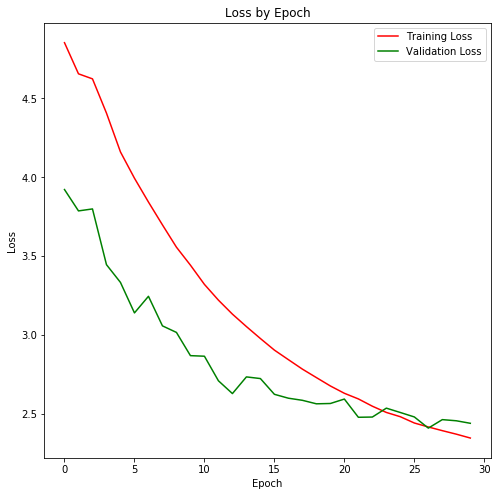

In [35]:
train = plt.plot(range(30), history.history['loss'], 'r', label='Training Loss')
valid = plt.plot(range(30), history.history['val_loss'], 'g', label='Validation Loss')
plt.title("Loss by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

We see a shape to our loss that is consistent with many other training processes in deep learning. We see an exponential drop in our loss that tapers out near the end. I believe we fell a bit shy of fully training our model, but we do see that we are receiving increasing diminishing returns on each epoch. Out of respect for time, let's take a look at the results we do have. Having saved a model at each epoch allows us to easily visualize the output on example images to see how these models are performing.

Let's first define a couple functions that we will use to plot our images and bounding boxes from these models. The first function allows us to plot images and their bounding boxes, the second function utilizes the first function to plot multiple images for a number of specified epochs.

In [50]:
def plot_img_with_bb(i, img, results):    
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    currentAxis.set_xticks([])
    currentAxis.set_yticks([])
    # Draw all bounding boxes
    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

In [94]:
def plot_by_epoch(images, inputs, epoch_nums, h, w):
    fig = plt.figure()

    js = epoch_nums
    allJ = len(js)
    allI = len(images)
    
    for j in range(allJ):
        file = str(js[j]).zfill(2)
        file_loc = 'checkpoints_pre30/weights.'+file+'.hdf5'
        model.load_weights(file_loc, by_name=True)
        preds = model.predict(inputs, batch_size=16, verbose=1)
        results = bbox_util.detection_out(preds)
        for i, img in enumerate(images):
            ax = fig.add_subplot(allJ, allI, 1+i+j*allI)
            plot_img_with_bb(i=i, img=img, results=results)

            
            if j == 0:
                ax.set_xlabel('Image ' + str(i+1), fontsize=20)
                ax.xaxis.set_label_position('top')
            
            if i == 0:
                if js[j] == 999:
                    ax.set_ylabel('Pre-Trained Final Model', fontsize=20)
                else:
                    ax.set_ylabel('Epoch '+ str(js[j]+1), fontsize=20)


    fig.set_figheight(h)
    fig.set_figwidth(w)
    st = fig.suptitle("Visualization of Bounding Box and Labels by Model Epoch", fontsize="x-large")

    fig.show()

Let's now randomly select and pre-process a few images out of our validation set.

In [73]:
NUM_EXAMPLES = 5
inputs = []
images = []
shuffle(val_keys)
epochs = [i+1 for i in range(nb_epoch)]
for i in range(NUM_EXAMPLES):
    img_path_f = img_path + val_keys[i]
    img = image.load_img(img_path_f, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path_f))
    inputs.append(img.copy())

input_f = preprocess_input(np.array(inputs))

Let's visualize what images we are looking at:

5/5 [==============================] - 0s


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


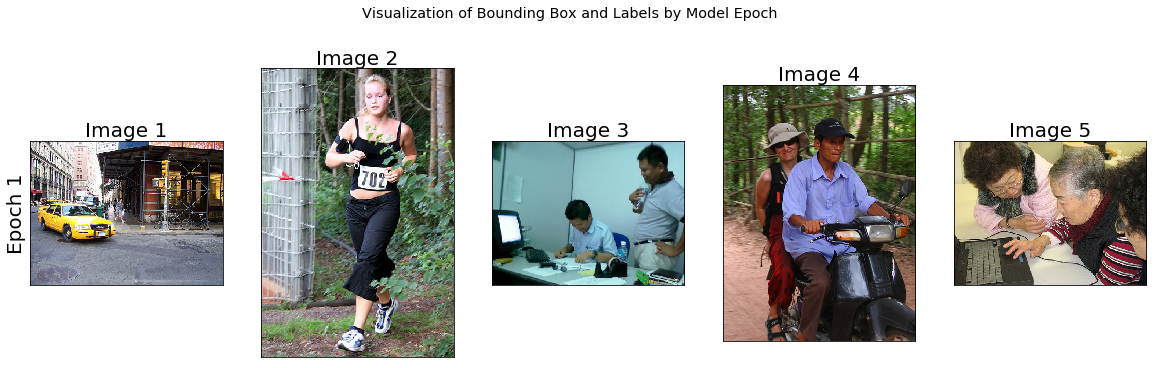

In [92]:
plot_by_epoch(images, input_f, [0], 6, 20)

So now that we see some example images, let's visualize what the model outputs at various stages throughout training.

**IMPORTANT NOTE:** *The final row presented below represents the pre-trained model provided by the author. The weights of this final pre-trained model are NOT trained with an identical process as I have presented above, but utilizes the same architecture. You may download these weights from the author in the links below.*

(Github Source: https://github.com/rykov8/ssd_keras)

(Model Weights Source: https://mega.nz/#F!7RowVLCL!q3cEVRK9jyOSB9el3SssIA)

5/5 [==============================] - 0s


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


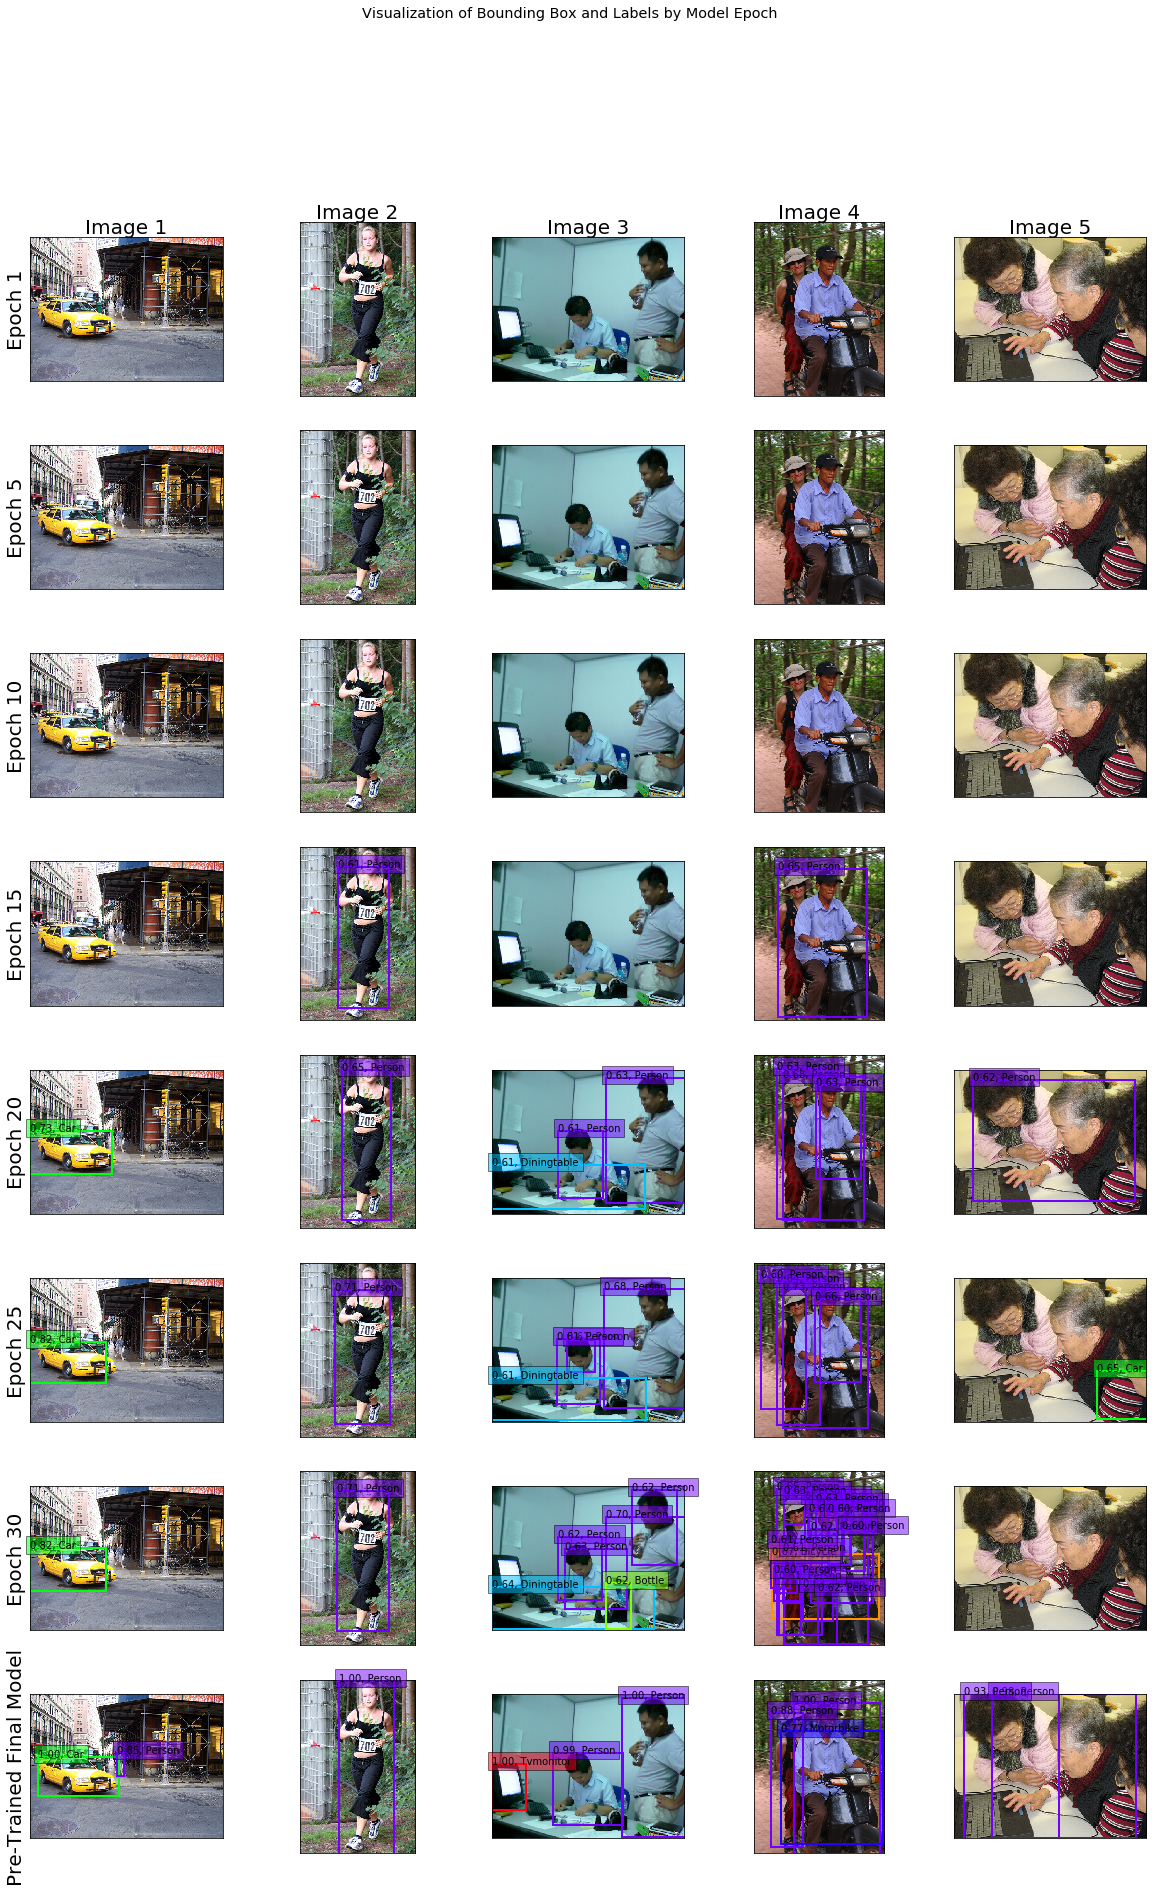

In [93]:
plot_by_epoch(images, input_f, [0,4,9,14,19,24,29,999], 30, 20)

### Results Interpretation over Training Process

This visualization illuminates what is going on under the hood during the training process. We have tagged objects in these images based on their respective labels and confidence. We can see how our network is gradually learning how to detect certain objects and the refinement of its results as it continues to train.


#### Image 1

Looking at image 1, we see that initially the network is unable to detect any of the objects we're seeking to identify. Over time, however, the network is able to find the taxi in the picture and correctly identify it as a "Car" starting around Epoch 20. After Epoch 20, you can see that its confidence gradually increases as the model continues to train. We also notice that the bounding box that is defined moves around a bit as it tries to refine precisely which part of the image corresponds to the "Car". Eventually we are even able to pick up very small (relative) objects in the image like the "Person" that is tagged in the final pre-trained model.

#### Image 2

We see a similar progression for image 2. Initially struggling to identify the running "Person" in the picture, but ultimately learning the proper detection and recognition. The refinement process is clear as the bounding box eventually expands to include the entire resolution of the person, as well as its confidence is significantly higher (even reaching 100% in the final model).

#### Image 3

Image 3 is an interesting case to look at. We see that the model eventually learns to identify the two "Person"s in the image, as well as a table (label is overly-explicit in declaring "Diningtable"). We even see that in Epoch 30 that it can detect the water bottle in the image (albeit with low confidence). However, we see an improper collapse of bounding boxes present in Epoch 25 and 30, where there are multiple overlapping boxes for the same classification. This however, is learned properly in later epochs as shown in the final pre-trained model. The pretrained model even picks up a class that was not detected early on in training, "Tvmonitor" (referring to the computer screen). This latter model, however, is no longer detecting the table nor the bottle that we saw it able to predict earlier.

#### Image 4

In Image 4, we see issues with the non-maximal suppression again arise in epochs 25-30, eventually soothed after further training (final model). We also see its improvement in classification, ultimately learning that the object they are riding on is more similar to a motorbike (blue box in last model) than a bicycle (orange box in epoch 30).

#### Image 5

Lastly, in Image 5 we see that at some point (epoch 20), we are able to detect "Person" correctly, but the bounding box includes both people, rather than properly identifying two individual boxes as we see is eventually learned down the line. One interesting thing to note is that it detects a car in the bottom-right of the image at epoch 25. This appears to be an overcorrection from being unable to detect a car in some of our other images. The model quickly learns, however, that this is an improper identification and ultimately excludes that bounding box and classification.



### Future Improvements/Changes

*Longer Training Time:* We see that there is still quite a bit that the model is able to learn between our model that we trained for 30 epochs and the "final" trained model. This is also apparent in the fact that our training and validation loss had not entirely tapered off after 30 epochs, it was still decreasing. For the purposes of this project, resource management was critical (including time). However, given enough time and computational resources, we would be able to train further to see additional performance improvements.

*Additional or Different Classes:* We can explore classes outside of the PASCAL VOC dataset. Similarly to how we were able to leverage transfer learning in the inception network in our homework, we can apply this approach to the SSD300 network. It may be interesting to explore the capabilities of this network outside of the 20 classes we have defined. The drawback of this is that we would require annotated image data for these new classes -- this may be difficult to come by.

*Pure Tensorflow Implementation:* Some people prefer working directly in Tensorflow rather than Keras, a library built on top of it. That being said, this is particularly case dependent based on who your coworkers and audience are.

### Conclusion

In general, we see that we have successfully created a pipeline for object detection and recognition as we sought out to do. Our model, trained on the PASCAL VOC2012 data, is able to identify a variety of objects ranging from airplanes to people, and provide associated coordinates where that object appears in the image. We may apply our network to any image and we should be able to receive annotations of objects within that image as a result.

You may find the final weights for the model produced by this notebook and report located within the parent directory, entitled `ssd_weights_sr3336.hdf5`.

I hope that this notebook was educational and informative. If you have any further questions, please feel free to submit an issue on Github or e-mail me directly at sr3336@columbia.edu.